# Comparación del sesgo-varianza con hipótesis lineales y constantes.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

### Generación de las hipótesis constantes

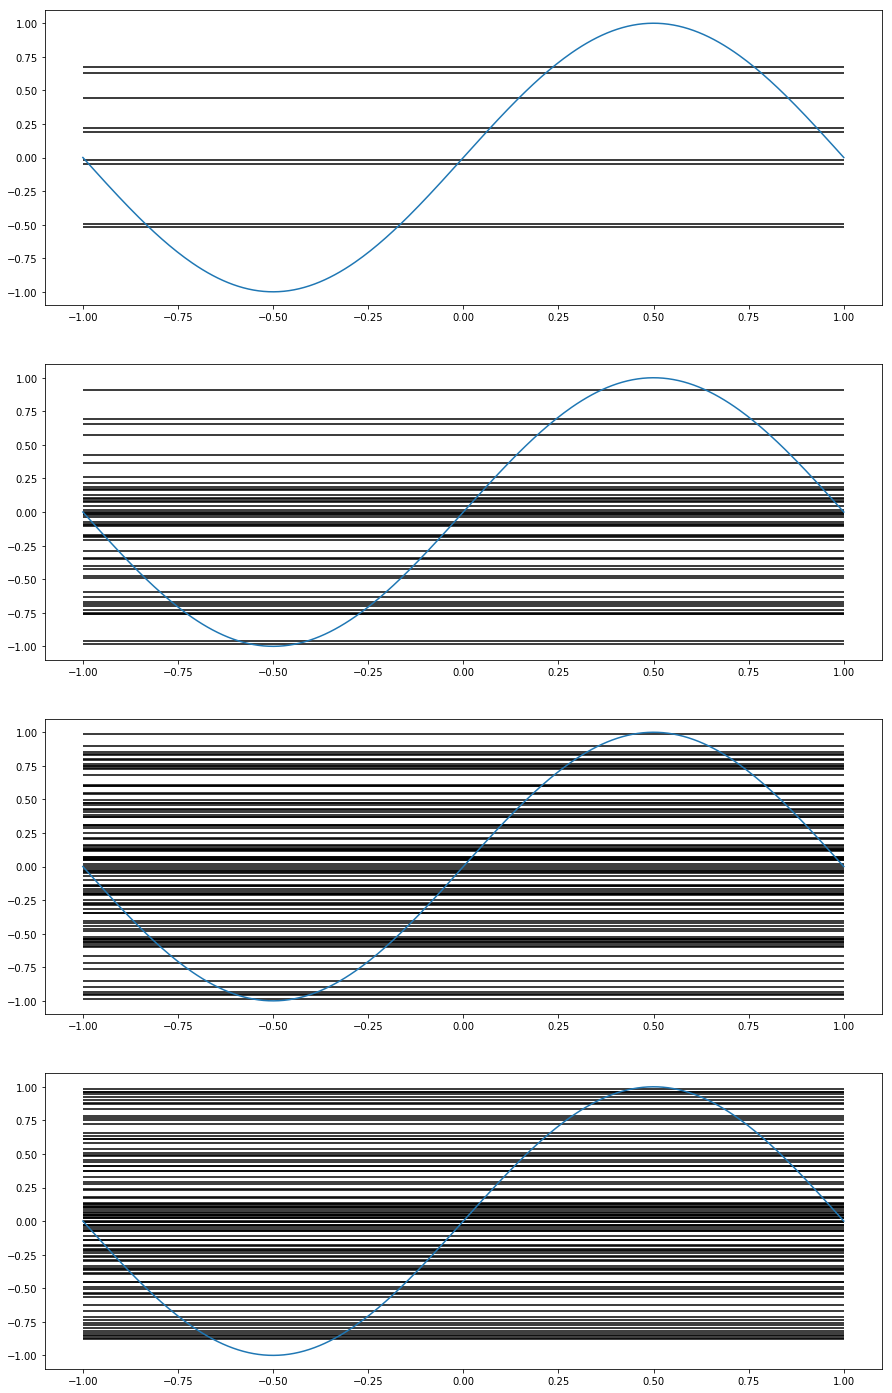

In [2]:
fig, ax = plt.subplots(4, 1, figsize=(15, 25))

hypotesis = []
all_hyp = []

for sample_size, j in zip((10, 50, 100, 1000), range(4)):
    # Generación de los datos.
    data = np.array(sorted(np.random.uniform(-1, 1, 2000)))
    # Selección de los de entrenamiento.
    t_data = np.random.choice(data, sample_size)
    y = np.sin(np.pi * t_data)
    # Generación de las hipótesis.
    a = [(y[i] + y[i + 1]) / 2 for i in range(sample_size - 1)]

    # Función sen(pi * x).
    x1 = np.linspace(-1, 1, 300)
    y1 = np.sin(np.pi * x1)

    ax[j].plot(x1, y1)
    for i in range(sample_size - 1):
        if sample_size <= 100:
            ax[j].hlines(a[i], xmax = -1, xmin = 1)
        else:
            if i % 10 == 0:
                ax[j].hlines(a[i], xmax = -1, xmin = 1)
    
    # Se guardan las hipótesis para después.
    hypotesis.append(np.mean(a))
    all_hyp.append(a)

### Cálculo del sesgo y de la varianza

In [3]:
x = np.linspace(-1, 1, 300)
f = np.sin(np.pi * x)

biases = [np.mean(np.abs((f - h)**2)) for h in hypotesis]
variances = [np.mean(np.var([a for _ in range(300)], axis=1)) for a, h in zip(all_hyp, hypotesis)]

Text(0, 0.5, 'Valor promedio')

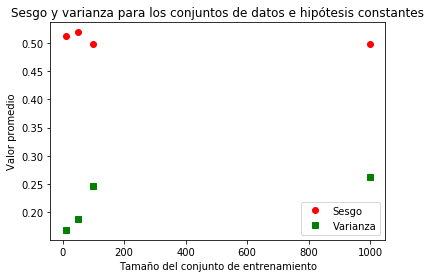

In [4]:
fig, ax = plt.subplots()

ax.plot([10, 50, 100, 1000], biases, 'ro', label='Sesgo')
ax.plot([10, 50, 100, 1000], variances, 'gs', label='Varianza')

legend = ax.legend(loc='best')

plt.title('Sesgo y varianza para los conjuntos de datos e hipótesis constantes')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Valor promedio')

### Generación de las hipótesis lineales

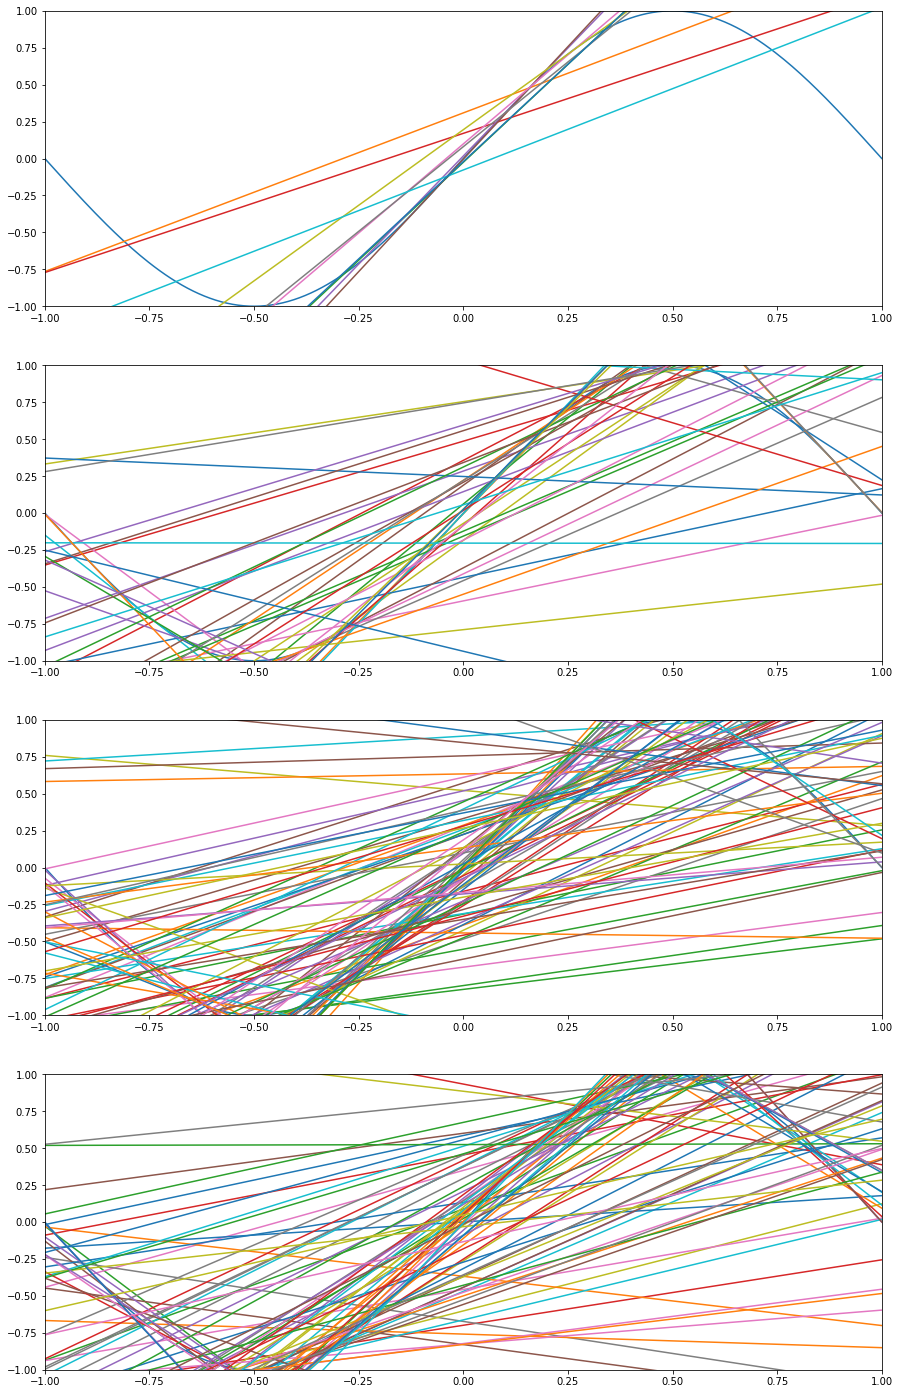

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(15, 25))

hypotesis_m = []
hypotesis_b = []
all_hyp_m = []
all_hyp_b = []

for sample_size, j in zip((10, 50, 100, 1000), range(4)):
    # Generación de los datos de entrenamiento.
    t_data = [[np.random.uniform(-1, 1), np.random.uniform(-1, 1)] 
             for _ in range(sample_size)]
    target = [[np.sin(np.pi * x[0]), np.sin(np.pi * x[1])] for x in t_data]
    
    # Cálculo de la hipótesis
    a_m = [(y[1] - y[0]) / (x[1] - x[0]) for x, y in zip(t_data, target)]
    a_b = [y[0] - a*x[0] for x, y, a in zip(t_data, target, a_m)]

    # Función sen(pi * x)
    x1 = np.linspace(-1, 1, 300)
    y1 = np.sin(np.pi * x1)

    ax[j].plot(x1, y1)
    ax[j].set_xlim(-1, 1)
    ax[j].set_ylim(-1, 1)
    for i in range(sample_size):
        if sample_size <= 100 or i % 10 == 0:
            h = a_m[i] * x1 + a_b[i]
            ax[j].plot(x1, h)
    
    # Se guardan para despúes.
    hypotesis_m.append(np.mean(a_m))
    hypotesis_b.append(np.mean(a_b))
    all_hyp_m.append(a_m)
    all_hyp_b.append(a_b)

### Cálculo del sesgo y de la varianza

In [6]:
x = np.linspace(-1, 1, 300)
f = np.sin(np.pi * x)

biases = [np.mean((f - (h_m * x + h_b))**2) for h_m, h_b in zip(hypotesis_m, hypotesis_b)]
variances = [np.mean([np.var(m * x + b) for m, b in zip(h_m, h_b)]) for h_m, h_b in zip(all_hyp_m, all_hyp_b)]

Text(0, 0.5, 'Valor promedio')

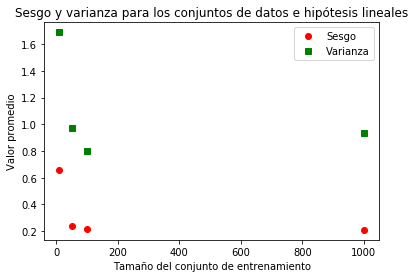

In [7]:
fig, ax = plt.subplots()

ax.plot([10, 50, 100, 1000], biases, 'ro', label='Sesgo')
ax.plot([10, 50, 100, 1000], variances, 'gs', label='Varianza')

legend = ax.legend(loc='best')

plt.title('Sesgo y varianza para los conjuntos de datos e hipótesis lineales')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Valor promedio')